<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 

import os
import re

from functools import reduce
from collections import defaultdict

# Custome Analysis

In [2]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail_II.xlsx',
 '1_orders_dataset.csv',
 'sales_data_with_stores.csv',
 'ab_experiment.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'sales.csv',
 'bz_data_analyis.csv',
 'groceries.csv',
 'sales_vs_discount.csv',
 'lead_conversion.csv',
 'app_wau.csv',
 'mock_sales_data.csv',
 'online_retail.xlsx',
 'test.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'match_result_test.csv',
 'mall_customers.csv',
 'ecommerce-data.csv',
 '1_order_payments_dataset.csv',
 '1_customers_dataset.csv',
 'sample-sales-data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'cookie_cats.csv',
 'scanner_data.csv',
 'sample_data']

In [3]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [12]:
cnt_ret = pd.melt(df, id_vars=['userid','version','sum_gamerounds'], var_name='retention', value_name='result')
cnt_ret = cnt_ret.groupby(['version', 'retention', 'result'])['userid'].count().reset_index().rename(columns = {'userid':'au'})
cnt_ret['ratio'] = cnt_ret.groupby(['version','retention'])['au'].apply(lambda x : round(x/sum(x)*100,2))
cnt_ret = cnt_ret[cnt_ret['result'] == True].reindex(['version','retention','ratio'], axis = 1)
cnt_ret

,version,retention,ratio
1,gate_30,retention_1,44.82
3,gate_30,retention_7,19.02
5,gate_40,retention_1,44.23
7,gate_40,retention_7,18.20


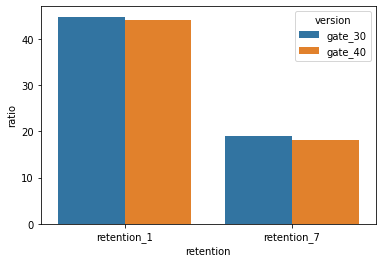

In [14]:
sns.barplot(data = cnt_ret, x = 'retention', y = 'ratio', hue = 'version')

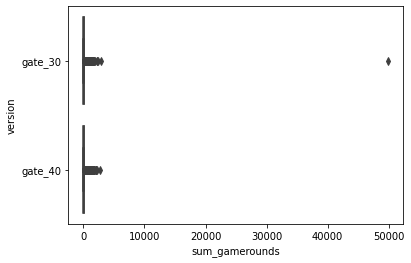

In [15]:
sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')

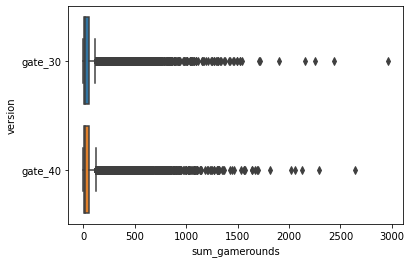

In [16]:
df = df[df['sum_gamerounds'] <= 10000]
sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')

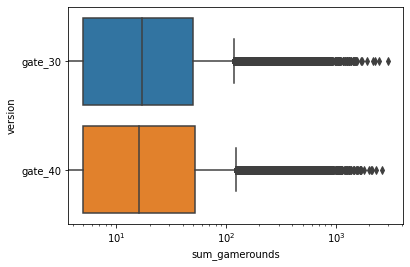

In [17]:
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')

In [20]:
import pylab
from scipy import stats 

((array([-4.32330209, -4.12353114, -4.01483812, ...,  4.01483812,
          4.12353114,  4.32330209]),
  array([   0,    0,    0, ..., 2438, 2640, 2961])),
 (71.54691083221576, 51.32025324876927, 0.696746813756345))

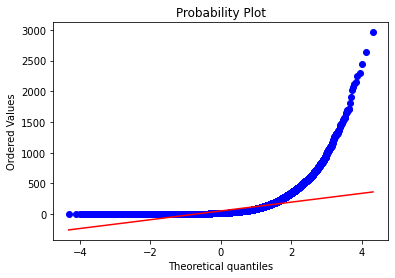

In [23]:
stats.probplot(df['sum_gamerounds'], dist = 'norm', plot = pylab)

In [34]:
def get_shapiro(df) :
  stat, p = stats.shapiro(df)
  print(f'Stats = {stat:.3f}, p = {p:.3f}')

  if p > .05 :
    print('Probably Gaussian')
  else :
    print('Probably not Gaussian')

In [36]:
get_shapiro(df.sum_gamerounds)

Stats = 0.486, p = 0.000
Probably not Gaussian


In [37]:
def k_squared(df) :
  stat, p = stats.normaltest(df)
  print(f'Stat : {stat:.3f}, p : {p:.3f}')
  
  if p > .05 :
    print('Probably Gaussian')
  else :
    print('Probably not Gaussian')

In [38]:
k_squared(df.sum_gamerounds)

Stat : 104181.605, p : 0.000
Probably not Gaussian


In [44]:
n = 1000
boots = [df.sample(frac = 1, replace = True).groupby(['version'])['sum_gamerounds'].mean() for i in range(n)]
df_bootstrap = pd.DataFrame(boots)
df_bootstrap.head()

version,gate_30,gate_40
sum_gamerounds,51.029389,50.957908
sum_gamerounds,51.415335,52.088681
sum_gamerounds,51.414956,51.640090
sum_gamerounds,51.422233,51.549591
sum_gamerounds,50.407309,51.245002


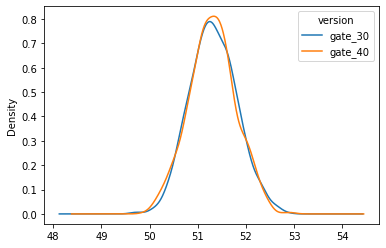

In [45]:
df_bootstrap.plot.kde()

In [52]:
df_bootstrap['diff'] = df_bootstrap['gate_30'] - df_bootstrap['gate_40']
cnt_positive_mean = len(df_bootstrap[df_bootstrap['diff'] > 0])
cnt_positive_mean/n

51.2

# Iterators

In [53]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [54]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}